<a href="https://colab.research.google.com/github/b-hill/cop4630/blob/master/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn import cluster
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import MobileNet

iris = datasets.load_iris()

Using TensorFlow backend.


# General Concepts

Artifical Intelligence, Machine Learning and Deep Learning are all deeply intertwined. An accurate description of their relationships to eachother would be a Russian nesting doll. AI is the largest. ML is in the middle, a subset of AI. DL is the smallest, a subset of both AI and ML (1). 

![Diagram](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSPl_Vby9f4oJrOKANAd8gukPY29jNoredJEbvJIr6tV5JYw5ZK&usqp=CAU)(7)

## What is AI?

In the words of Professor Wocjan, **Artificial Intelligence** is just an umbrella term for a program that does something smart (1). Usually, this "something smart" is making a decison based on the what the user wants. This decision could be anything from "How much should i tip my server?" to "What kind of flower is this?" to even "Does this picture contain a cat or a dog?".

### Symbolic AI vs Non-Symbolic AI

If we were to draw a Venn Diagram of AI and Machine Learning, you would get 2 concentric Cirlces where the AI circle completely encompasses the ML circle. The area outside the ML circle but inside the AI circle would be **Symbolic AI**. The critical difference isnt what you expect the AI to do but it is instead *how* you expect the AI to accomplish it. With Symbolic AI, the program itself is a set of rules created by the developer. The user than introduces an input and the program produces an output. **Non-Symbolic AI** is the same idea with the order of operations slightly flipped. Here, the program is a *derived set of rules*. The machine learns and creates rules based on what the user expects given an input and expected output. 

Symbolic AI can be thought of as similar to a flowchart. The rules are layed out already like a pipeline. 

![Symbolic AI](https://www.breezetree.com/images/simple-flow-chart-example.png)(8)

## What is Machine Learning?

**Machine Learing** otherwise known as Non-Symbolic AI, can be broken down into several categories based on what the developer wants the machine to learn. These categories of learning are: Supervised, Unsupervised, and Reinforcement (2).

### Supervised Learning

In this case **Supervised** refers to the labeling of the expected outputs of the data. A marquee example of Supervised Learning is the Iris Classificiation Problem (3). Essentially the input data is a collection of basic measurements of Iris Flowers. Each of one these flowers is attatched to an Iris flower species *label*. For reference, the 4 measurements are the length and width of both the sepal and petal. So the machine learning program has to determine the rules to predict the Iris flower species based on these parameters. This is a **classification** problem, meaning the output is discrete categorization of the input. The other type is **regression** where the output is continious. An example of regression supervised learning would be predicting a students final class grade based on certain inputs like their sleep schedule and study habits. In this case, the output would be a number not a class. 

In [2]:
# Simple example on the iris data set using a Support Vector Machine model
classifier = svm.SVC()
classifier.fit(iris.data[:-1], iris.target[:-1]) # fit on all but last row
prediction = classifier.predict(iris.data[-1:])
expected = iris.target[-1:]
print(prediction, expected)

[2] [2]


### Unsupervised Learning

Unsupervised learning is very similar to supervised learning with one critical difference: there isnt an expeceted output. Instead, the goal of the machine is to make the categories and draw the lines between each class. Keep in mind the job of unsupervised learning is *not* to make the labels but to simply determine the boundries of these hypothetical classes. We can once again use the Iris flower data set. If we were to remove the labels, the machine would instead have to categorize the data set into groups it *thinks* are different species. Essentially, you would pass your data through an unsupervised learning machine if you wnate dto uncver hidden patterns and structures in your data. 

In [3]:
# Simple example on the iris data set using a K Means clustering model
k_means = cluster.KMeans(n_clusters=3) 
k_means.fit(iris.data)
prediction = k_means.labels_[::10]
expected = iris.target[::10]
print(prediction, expected) # as you can see, the labels are irrelvant. Its 
                            # just important that the model determined the class
                            # boundries

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2] [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


### Reinforcement Learning

This branch has a slightly different strucure. The goal is to **Reinforce** the behavior of the model (also known as the agent in RL) to act a certain way or acheive a certain goal. One example is a chess-playing AI. The goal of the AI would be to never lose. The agent would play over and over again, learning the best ways to not lose. It can be thought of as using reinforcement with treats to train a dog. The reward for the dog is a treat and they get it by learning the behavior. For the RL agent the behavior is not losing. Essentially, an agent continously takes in the game state and uses the reward or lack there of to make an action.

![Example](https://www.researchgate.net/profile/Roohollah_Amiri/publication/323867253/figure/fig2/AS:606095550738432@1521515848671/Reinforcement-Learning-Agent-and-Environment.png)(9)

## What is Deep Learning?

Deep learning is the process of using layered neural networks to extract features from raw input. Each layer is a different level of abstraction away from the input towards the output. The first layer might define edges and curves, the second might recognize basic shapes until the last layer identifies the content of the picture is revealed, maybe a dog or a cat. 

![Model](https://www.researchgate.net/profile/Wanli_Xing2/publication/323784695/figure/fig5/AS:613990283628562@1523398099969/Deep-learning-diagram.png)

# Basic Concepts

## What is Linear Regression?

**Linear Regression** is a supervised learning method that uses a bias and weights to predict an output given multiple features. Linear Regression is a concept many people are familiar with, commonly knowing it as:

y = mx + b

However, for ML purposes, it is better written as:

$\hat{y}$ = b + wx

Where:
- $\hat{y}$ is the predicted label
- b is the bias 
- w is the wieght of the feature
- x is the value of the feature

This can also be written as:

$\hat{y}$ = b + $\sum_{j=1}^{n} w_jx_j$

When there is more than one feature realtionship under analysis.




## What is Logistic Regression?

**Logistic Regresion** is very similar to Linear Regression with one simple but major stipulation. Logistic Regression passes the expected output through an activation function, typically the sigmoid function, in order to map the unbounded output to a vlaue between 0 or 1. This makes it very useful for classification problems where as Linear Regression is better for normal regression. 

If we assume that the activation functuon used is the sigmoid function, the Logistic Regression model looks like this:

$\hat{y'} = sigmoid(\hat{y}) = sigmoid(b + \sum_{j=1}^{n} w_jx_j)$

### Sigmoid Function

Commonly known as the 'S Curve', the **Sigmoid Function** is one of many activation functions used to classify a models output. It does this by modifiying the output and sometimes also imposing a threshold on the result. 

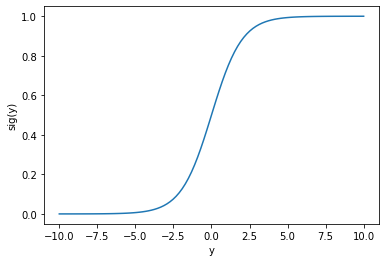

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-10,10,100)
plt.plot(z, sigmoid(z))
plt.xlabel('y')
plt.ylabel('sig(y)')
plt.show()

## What is the gradient function?

The **gradient function** is very similar to but not the same as the derivative. The value of the gradient at a point is a tangent vector – a vector at each point; while the value of the derivative at a point is a cotangent vector – a function of vectors at each point. Essentially: the gradient is the direction and rate of greatest increase while the derivative is just a scalar value of the magintude of the rate of change at a point. 

## What is gradient descent?

**Gradient Descent** is the method to minimize the loss of your model in an effort to make it more accurate. If you were to imagine the loss function as an elevation map of a valley, the gradient descent method would find the point of lowest elevation corresponding to the lowest loss. It accomplishes this by looking at the gradient of the point where youre standing and using it as a guide to tell you where to go. The gradient shows you in which direction loss is decreasing the fastest. 

![descent](https://storage.ning.com/topology/rest/1.0/file/get/3713179836?profile=)(13)

### Learning rate


**Learning rate** is a coefficient that modifies the gradient at each step. This can be used to either increase (LR greater than 1) or decrease (LT lower than 1) the size of the step made by the gradeint descent function. You must be careful as the learning rate can make or break your model. If the LR is too high than it will take too large of steps and will continually over shoot the global minimum of the loss function, rendering your model useless. However if it is too small then the model will not find the minimum efficiently. 

# Building a Model

## Model Structure

Artifical Neural Networks are made up of various different layers in sequence that each have their own special jobs. The architecture of these models generally look something like this: 

![Model](https://miro.medium.com/max/1400/1*LTRcAyl6zuuJvpU-5KECZA.png)(11)

This type of model is called **Sequential** which means that an input tensor, for example a vectorized image, is passed through a series of layers. The output of this model is typically a single value or a 1D vector, for example a classification of the contents of the image. 

In [0]:
# Lets start our sequential model
model = Sequential()
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Layers

While there are many many kinds of **layers** to use in neural networks, this class covered three of the most important and most used: Dense, Pooling, and Convolutional. 


### Convolutional Layer

The presence of a convolutional layer is what sets Convolutional Neural Networks apart from their normal Artifical neural network counterparts. Convolution is, according to Wolfram Alpha, a "blending of one function of another" (6). More specifically, its an intergral that expressed the overlap of one function after its been flipped and shifted over another. In the context of a CNN, its essentially a method to filter a tensor.  

In [6]:
model.add(Conv2D(64, kernel_size=5, activation='relu', input_shape=(28,28,1)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
Total params: 1,664
Trainable params: 1,664
Non-trainable params: 0
_________________________________________________________________


### Pooling Layers

These are usually used to decrease the size of the working data within a model without decreasing the integreity of the model. By taking a downsample of a layer thorugh pooling we can reduce the number of operations required for the following layer to prodice a valid result. One method of doing this is Max-Pooling, which essentially takes the max value of a sub-tensor within the layer output and returns it. When this is performed over the entire output tensor, you can saefly reduce its size significantly (6). 

In [7]:
model.add(MaxPool2D(strides=2, padding='valid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
Total params: 1,664
Trainable params: 1,664
Non-trainable params: 0
_________________________________________________________________


### Flatten

These layers are a more specific case of reshape layers. Flatten layers condense the tensor into a 1D vector, "Flattening" it. 

In [8]:
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
Total params: 1,664
Trainable params: 1,664
Non-trainable params: 0
_________________________________________________________________


### Dense Layers

Also known as fully-connected layers. These can be thought of layers that perform a type of logistic regression on their input vectors (5). Dense layers can be stacked sequentially to model increasingly complex mathemiatical equations but they are not without limitation. Because they will always get the same output for the same input, they cannot detect patterns over time or the affects of repititon. Recurrent layers can resolve this, but they were not focused on in this class. 

In [9]:
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                92170     
Total params: 93,834
Trainable params: 93,834
Non-trainable params: 0
_________________________________________________________________


### Other layers


This list of layers is not exhaustive, its just to showcase what other kinds of layers are commonly used. 

- Normalization: These layers are simple, they normalize the values across the tensor(6). These are particualt useful for batch normalization and feature scaling. 

- Reshape: These layers reshape in the input tensor. These dont change the data in any way, they simply modulate the dimensions to fit the next layer.

# Compilng a Model

## Loss Functions

The loss functions can be thought of a metric determining how wrong your model is. Your model iterates itself over and over again thorugh gradient descent trying to minimize the output of the loss function. Choosing your loss function well is critical as how you rmodel develops hinges on it being effective. The primary parameter one should consider while chossing a loss function is the problem type. For example, binary classification needs a loss function like binary-cross-entropy while a normal regression problem might best utilize mean-squared-error (15).

![Loss](https://algorithmia.com/blog/wp-content/uploads/2018/04/word-image-4.png)(12)

## Optimizers

Optimizers act as the tool to minimize the loss function, the staple optimizer is standard gradient descent but that is not the only one. In fact, it is one of the least efficient (15). One of the best optimizers is ADAM or Adpative Moment Estimation. Here is a comparison of a slew of a few optimizer's effectivness when faced with a saddle point (16).

![Opti](https://miro.medium.com/max/1400/1*ZxvrAp_3VubvJf0K3NPT7Q.gif)

## Activation Functions 

The activation function is the fucntion that the model output passes through. Its main use is to make the output something useful and definitive. A marquee example is the sigmoid function from earlier. Here is a compoarison of the most popular activation functions and what they loom like. 

![Activation](http://rasbt.github.io/mlxtend/user_guide/general_concepts/activation-functions_files/activation-functions.png)(17)

## Our Model

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training a model

## Data splitting 

In order to train your model, you need data. In order to train your model properly, you have to *split* your data. Typically, you need to split your data into 2 sets, but sometimes there can even be a third (18). 
- The **Train** set is the piece of your dataset used to fit your model. It is usually comprised of 70-80 percent of all your data.
- The **Test** set is the piece of the the dataset that the already fitted model is evaulated against. It is *critical* that your model never trains on any of this data or the model is compromised and is at extreme risk of overfitting. It is usaully 10 - 20 percent of the data. 
- The **Validation** set is sort of an inbetween. Essentially this set is used to fine tune your model. So while the model never trains on this data, the model sees it frequently while you fine tune model parameters. It is usaully 10 - 20 percent of the data. This set is not always used.

## Overfitting and Underfitting

Overfitting is what happens when a model is tuned too closely to the particular data it was trained on rather than the larger population of data it could be given. This happens often when the data is not properly split. If you train your model on the entire set and dont specify a test set, overfitting is a high risk. 

Underfitting is similar and is a more obvious issue. Basically, the test set isnt comprehensive enough to properly train the model. 

## Our model

In [11]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6040 - accuracy: 0.9482 - val_loss: 0.1103 - val_accuracy: 0.9698
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0922 - accuracy: 0.9752 - val_loss: 0.1130 - val_accuracy: 0.9733
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0832 - accuracy: 0.9775 - val_loss: 0.1320 - val_accuracy: 0.9622


# Finetuning a model

Fine tuning is when you take a pretrained model and add your own layers on top to train specifically for your own data set. 

In [12]:
conv_base = MobileNet(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

# Freeze convolutional base.
conv_base.trainable = False

# Add layers on top to fine-tune.
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'conv5_block2_2_conv': ## change frozen layer
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 7,423,681
Trainable params: 4,194,817
Non-trainable params: 3,228,864
_________________________________________________________________


# References

1. https://github.com/schneider128k/machine_learning_course/blob/master/slides/1_a_slides.pdf
2. https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Supervised_Learning_Unsupervised_Learning.php
3. https://en.wikipedia.org/wiki/Iris_flower_data_set
4. https://en.wikipedia.org/wiki/Gradient
5. https://medium.com/datathings/dense-layers-explained-in-a-simple-way-62fe1db0ed75
6. https://forums.fast.ai/t/dense-vs-convolutional-vs-fully-connected-layers/191
7. https://www.google.com/imgres?imgurl=https%3A%2F%2Fdpzbhybb2pdcj.cloudfront.net%2Fcai%2FFigures%2F01fig01_alt.jpg&imgrefurl=https%3A%2F%2Flivebook.manning.com%2Fbook%2Fdeep-learning-with-javascript%2Fchapter-1&tbnid=KCcYlQBPAjszxM&vet=12ahUKEwj76PC6jILpAhVCFlMKHQBkDhQQMygaegQIARBA..i&docid=cXfpmu-XMVtHIM&w=590&h=386&q=symbolic%20ai%20flowchart&ved=2ahUKEwj76PC6jILpAhVCFlMKHQBkDhQQMygaegQIARBA
8. https://www.breezetree.com/images/simple-flow-chart-example.png
9. https://www.researchgate.net/figure/Reinforcement-Learning-Agent-and-Environment_fig2_323867253
10. https://www.researchgate.net/figure/Deep-learning-diagram_fig5_323784695
11. https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
12. https://algorithmia.com/blog/introduction-to-loss-functions
13. https://storage.ning.com/topology/rest/1.0/file/get/3713179836?profile=RESIZE_710x
14. https://keras.io/optimizers/
15. https://keras.io/losses/
16. https://miro.medium.com/max/1400/1*ZxvrAp_3VubvJf0K3NPT7Q.gif
17. http://rasbt.github.io/mlxtend/user_guide/general_concepts/activation-functions_files/activation-functions.png
18. https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7